Mean Absolute Error (MAE) of the model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
# Load the data
df = pd.read_csv('weather_data_2024.csv')

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Extract year, month and day to new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [5]:
# drop the 'Date' column as there necessary information in other columns
df = df.drop(['Date'], axis=1)

In [6]:
# Select the features and the target
features = ['Year', 'Month', 'Day', 'Max_Temperature_(°F)', 'Avg_Temperature_(°F)', 'Max_Dew Point_(°F)', 'Avg_Dew Point_(°F)', 'Low_Dew Point_(°F)', 'Max_Humidity_(%)', 'Avg_Humidity_(%)', 'Low_Humidity_(%)', 'Max_WindSpeed_(mph)', 'Avg_WindSpeed_(mph)', 'Low_WindSpeed_(mph)', 'Max_Pressure_(in)', 'Avg_Pressure_(in)', 'Low_Pressure_(in)', 'Precipitation_(in)']
X = df[features]
y = df['Low_Temperature_(°F)']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Initialize the model
model = LinearRegression()

In [9]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [11]:
# Print the Mean Absolute Error of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2.639446367338328


In [12]:
# Print the predictions
print('Predictions:', y_pred)

Predictions: [46.42148482 37.02009822 35.82972539 43.40297131 38.2095453  41.62592782
 48.0637724   3.70990441 39.09797643 49.68970446  8.24165543  2.41201188
 47.51792762 38.45595437 35.94153774 34.98926443 45.13793148 42.71822188
 48.50601516]


This print an array of predicted values for 'Low_Temperature_(°F)' for the test set. 

In [13]:
# Create a DataFrame with actual and predicted values
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [14]:
# Print the DataFrame
print(df_predictions)

    Actual  Predicted
2       46  46.421485
13      37  37.020098
53      40  35.829725
41      42  43.402971
86      41  38.209545
30      45  41.625928
45      49  48.063772
43       0   3.709904
59      38  39.097976
90      46  49.689704
7        0   8.241655
26       0   2.412012
33      48  47.517928
68      39  38.455954
8       32  35.941538
16      30  34.989264
24      45  45.137931
79      44  42.718222
66      42  48.506015


Tto see the predictions alongside the actual values in a DataFrame


In [15]:
print(X_test.columns)

Index(['Year', 'Month', 'Day', 'Max_Temperature_(°F)', 'Avg_Temperature_(°F)',
       'Max_Dew Point_(°F)', 'Avg_Dew Point_(°F)', 'Low_Dew Point_(°F)',
       'Max_Humidity_(%)', 'Avg_Humidity_(%)', 'Low_Humidity_(%)',
       'Max_WindSpeed_(mph)', 'Avg_WindSpeed_(mph)', 'Low_WindSpeed_(mph)',
       'Max_Pressure_(in)', 'Avg_Pressure_(in)', 'Low_Pressure_(in)',
       'Precipitation_(in)'],
      dtype='object')


In [16]:
# Create 'Date' column in X_test
X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])

In [17]:
# create the DataFrame
df_predictions = pd.DataFrame({'Date': X_test['Date'], 'Actual': y_test, 'Predicted': y_pred})

In [18]:
# Assuming we have a DataFrame 'df' with columns 'Year', 'Month', 'Day', 'Lower_Temp'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Date'].values.reshape(-1,1), df['Low_Temperature_(°F)'], test_size=0.2, random_state=0)

In [20]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Create a DataFrame with the actual and predicted values
df_predictions = pd.DataFrame({'Date': pd.to_datetime(X_test.flatten()), 'Actual': y_test, 'Predicted': y_pred})

print(df_predictions)

         Date  Actual  Predicted
2  2024-01-03      46  46.421485
13 2024-01-14      37  37.020098
53 2024-02-23      40  35.829725
41 2024-02-11      42  43.402971
86 2024-03-27      41  38.209545
30 2024-01-31      45  41.625928
45 2024-02-15      49  48.063772
43 2024-02-13       0   3.709904
59 2024-02-29      38  39.097976
90 2024-03-31      46  49.689704
7  2024-01-08       0   8.241655
26 2024-01-27       0   2.412012
33 2024-02-03      48  47.517928
68 2024-03-09      39  38.455954
8  2024-01-09      32  35.941538
16 2024-01-17      30  34.989264
24 2024-01-25      45  45.137931
79 2024-03-20      44  42.718222
66 2024-03-07      42  48.506015


This table shows the actual and predicted values for the lower temperature for specific dates in 2024. The predicted values are generated by the model. The table is useful for comparing the accuracy of the predictions against the actual values. For example, on 2024-01-03, the actual value was 46 and the predicted value was 46.421485, which is quite close. However, on 2024-02-13, the actual value was 0 but the predicted value was 3.709904, which is a significant difference.

Conclusion:
The predicted values are relatively close to the actual values, indicating that the model is fairly accurate. However, there are some notable exceptions, particularly on dates where the actual value is 0 but the predicted value is significantly higher. This suggests that the model may not be as effective at predicting lower values or may not be accounting for certain factors that could cause a drop to 0. Overall, while the model seems to be generally reliable, it may need some adjustments to improve accuracy.

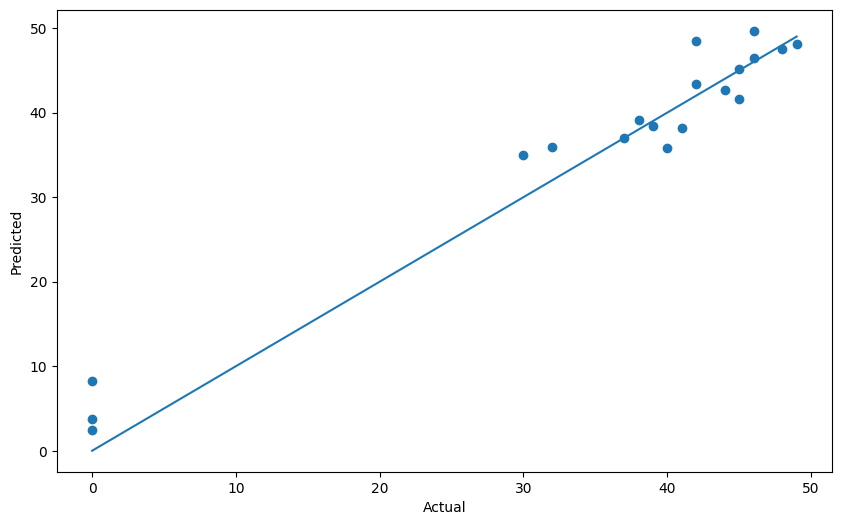

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [23]:
# Calculate the mean of each feature
mean_values = X.mean()

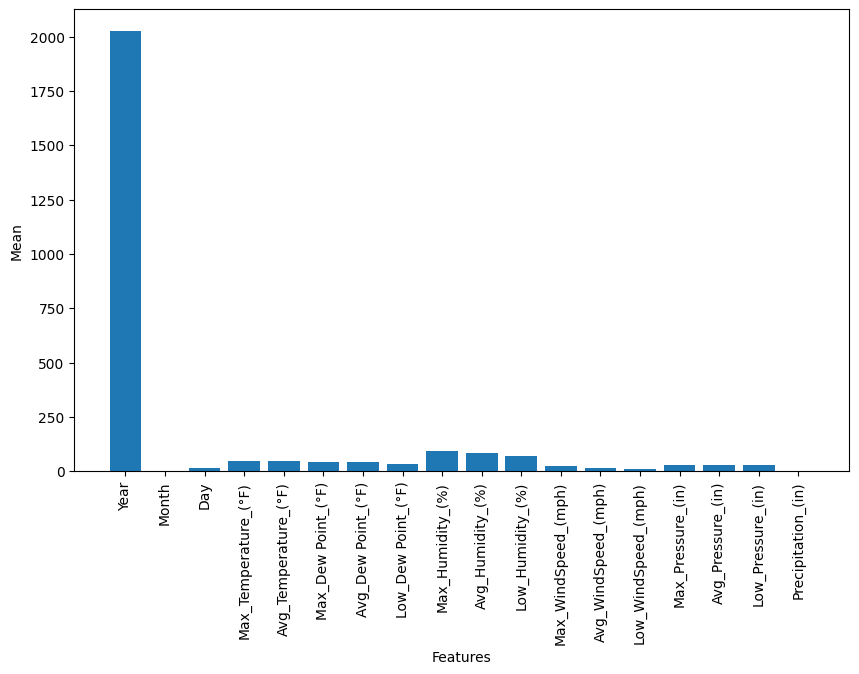

In [24]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_values.index, mean_values.values)
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [25]:
# Select the feature
feature = 'Max_Temperature_(°F)'
data = df[feature]

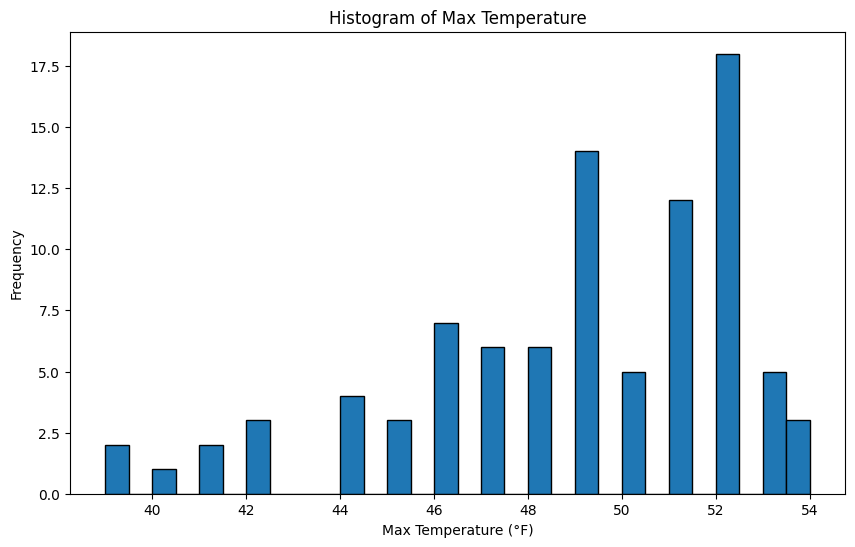

In [26]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Max Temperature')
plt.show()

In [27]:
# Select the feature
feature = 'Low_Temperature_(°F)'
data = df[feature]

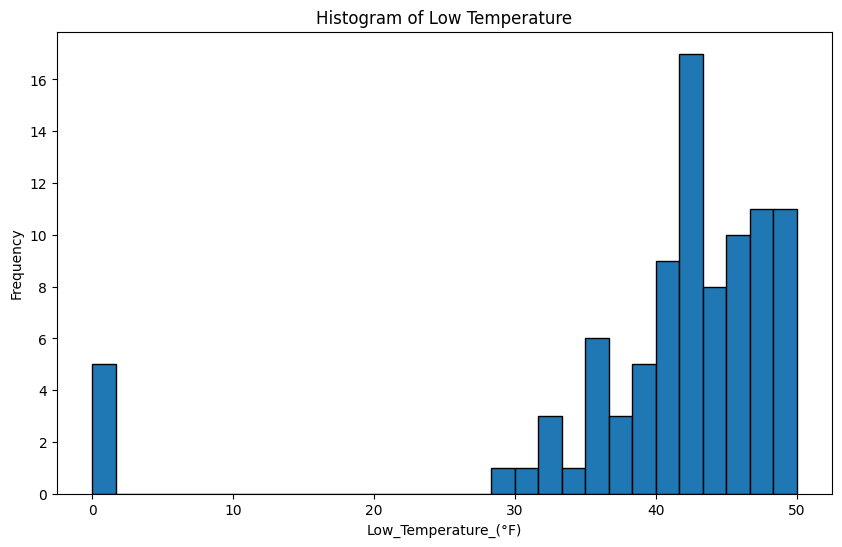

In [28]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.xlabel('Low_Temperature_(°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Low Temperature')
plt.show()

In [29]:
# Select the feature
feature = 'Avg_Temperature_(°F)'
data = df[feature]

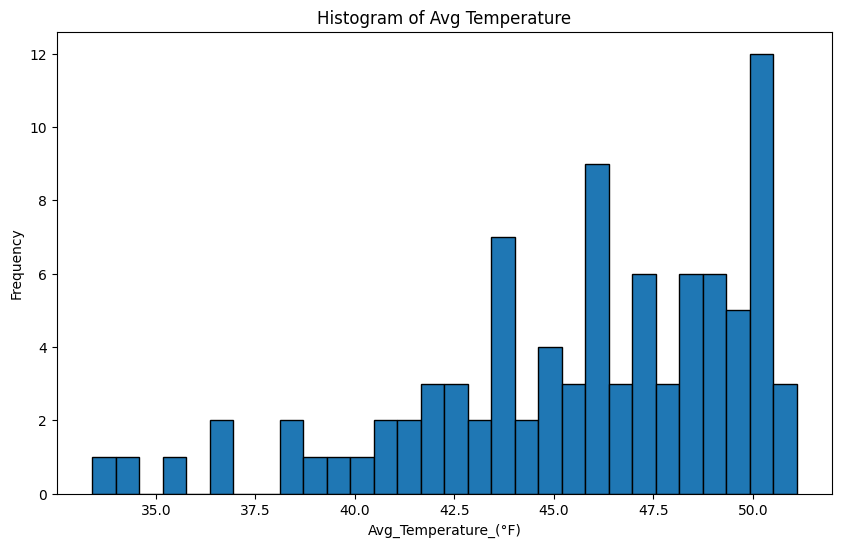

In [30]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.xlabel('Avg_Temperature_(°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Temperature')
plt.show()

In [31]:
pip install dash dash-renderer dash-html-components dash-core-components plotly


     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 163.8 kB/s eta 0:00:06
     - -------------------------------------- 0.0/1.0 MB 163.8 kB/s eta 0:00:06
     --- ------------------------------------ 0.1/1.0 MB 306.3 kB/s eta 0:00:04
     ----- ---------------------------------- 0.1/1.0 MB 448.2 kB/s eta 0:00:02
     ----------- ---------------------------- 0.3/1.0 MB 806.1 kB/s eta 0:00:01
     --------------------- ------------------ 0.6/1.0 MB 1.4 MB/s eta 0:00:01
     ------------------------------------ --- 0.9/1.0 MB 2.1 MB/s eta 0:00:01
     ---------------------------------------  1.0/1.0 MB 2.1 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 2.0 MB/s eta 0:00:00
  I

In [37]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

# Initialize the app
app = dash.Dash(__name__)

In [ ]:
if __name__ == '__main__':
       app.run_server(debug=True)

In [38]:
df_predictions = pd.read_csv('weather_data_2024.csv')

In [39]:
# Define the layout
app.layout = html.Div([
    dcc.Graph(
        id='Actual vs Predicted',
        figure={
            'data': [
                go.Scatter(
                    x=df_predictions.index,
                    y=df_predictions['Actual'],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name='Actual'
                ),
                go.Scatter(
                    x=df_predictions.index,
                    y=df_predictions['Predicted'],
                    mode='lines',
                    opacity=0.7,
                    line={'width': 0.5},
                    name='Predicted'
                )
            ],
            'layout': go.Layout(
                xaxis={'type': 'log', 'title': 'Date'},
                yaxis={'title': 'Values'},
                margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                legend={'x': 0, 'y': 1},
                hovermode='closest'
            )
        }
    )
])

KeyError: 'Actual'

In [35]:
app.layout = html.Div([
    dcc.Graph(
        id='Actual vs Predicted',
        figure={
            'data': [
                go.Scatter(
                    x=df_predictions.index,
                    y=df_predictions['Actual'],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name='Actual'
                ),
                go.Scatter(
                    x=df_predictions.index,
                    y=df_predictions['Predicted'],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name='Predicted'
                )
            ],
            'layout': go.Layout(
                xaxis={'type': 'log', 'title': 'Date'},
                yaxis={'title': 'Values'},
                margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                legend={'x': 0, 'y': 1},
                hovermode='closest'
            )
        }
    )
])